### Welcome to the Case Project Notebook on Digital Marketing 

**Problem Statement:**
* In the competitive landscape of online advertising, understanding the performance metrics of advertising campaigns is crucial for optimizing strategies and maximizing return on investment (ROI). 
* This dataset provides insights into the advertising performance of "Company X" from April 1, 2020, to June 30, 2020, including user engagement, ad sizes, placements, costs, clicks, revenue, and post-click conversions.

The _goal_ of this analysis is to uncover trends in user engagement, assess the impact of ad sizes on clicks, evaluate publisher placements, investigate the correlation between costs and revenue, identify high-performing campaigns, and analyze conversion rates. This will provide actionable insights for enhancing future advertising strategies and optimizing campaign performance.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Exploration:**
   - Load the dataset (`online_advertising_performance_data.csv`) into a DataFrame using Pandas.
   - Exploring the structure of the dataset (number of rows, columns, data types, unique values and recognising patterns for data analysis).

In [7]:
data = pd.read_csv('./online_advertising_performance_data.csv')
#pd.set_option('display.max_columns', None)
data.head(10)

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN
5,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,NaN,NaN
6,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,NaN,NaN
7,April,1,camp 1,Medium,160 x 600,def,2963,1.8899,4,0.7338,4,100.5044,NaN,NaN
8,April,1,camp 1,Medium,160 x 600,ghi,580,0.9917,9,1.6512,0,0.0000,NaN,NaN
9,April,1,camp 1,Medium,160 x 600,mno,20152,11.1678,185,33.9397,13,653.1896,NaN,NaN


In [8]:
data.tail(10)

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
15398,June,30,camp 3,Medium,728 x 90,def,5963,0.7884,40,2.2513,3,69.4256,NaN,NaN
15399,June,30,camp 3,Medium,728 x 90,ghi,710,0.9867,22,1.2386,0,0.0000,NaN,NaN
15400,June,30,camp 3,Medium,728 x 90,jkl,490,0.1686,8,0.4504,0,0.0000,NaN,NaN
15401,June,30,camp 3,Medium,728 x 90,mno,37790,2.6023,195,10.9785,0,0.0000,NaN,NaN
15402,June,30,camp 3,Medium,728 x 90,NaN,6,0.0048,0,0.0000,0,0.0000,NaN,NaN
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,NaN,NaN
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,NaN,NaN
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000,NaN,NaN
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000,NaN,NaN
15407,June,29,camp 3,High,240 x 400,def,1209,0.3184,2,0.1115,3,110.4224,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [12]:
#finding the NaN values in our dataset
missing_values_count = data.isnull().sum()
print(missing_values_count[missing_values_count > 0])

placement        413
Unnamed: 12    15408
Unnamed: 13    15408
dtype: int64


After looking around through the columns and info, we get to know about the dtypes and null values in our dataset. We can start with Data Cleaning and Preprocessing for furthur analysis. 
1) We can drop the unnamed columns 12, 13 in the dataset
2) Deal with NaN values in placement by substituting with central tendancy
3) 

##### Question 1: What is the overall trend in user engagement throughout the campaign period?

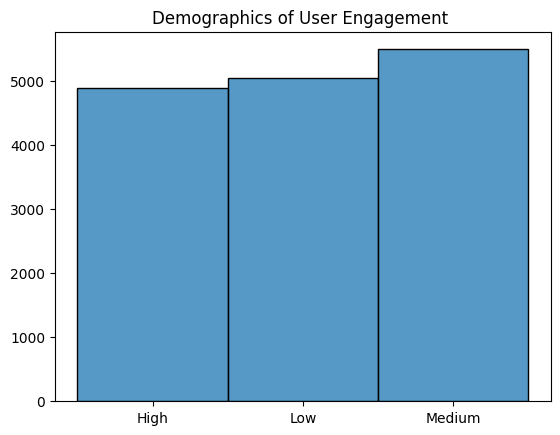

In [14]:
sns.histplot(data['user_engagement'], bins=100)
plt.title('Demographics of User Engagement ')
plt.xlabel('')
plt.ylabel('')
plt.show()